In [1]:
import pandas as pd
import os, glob, re
import glob

In [2]:
import plotly.express as px
import matplotlib.pyplot as plt   # 맷폴렛- 그래프
%matplotlib inline

# ignore warnings
import warnings    # 워닝 방지
warnings.filterwarnings('ignore')

####### matplotlib - 한글 폰트 깨짐 방지 코드 #######
import platform

if platform.system() == 'Darwin':    # 맥
    font_name = 'AppleGothic'
elif platform.system() == 'Linux':   # 리눅스
    font_name = 'NanumGothic'
elif platform.system() == 'Windows': # 윈도우
    font_name = 'Malgun Gothic'
else:
    print('알수없는 시스템. 미적용')

plt.rc('font', family=font_name)

In [3]:
os.getcwd()

'C:\\studyNote\\Project'

여기는 필요없는 코드입니다~

In [62]:
df_low = pd.read_csv('저지대율.csv', encoding='utf-8') 
df_low

,구,행정코드,저지대율
0,중구,2611000000,0.880763
1,서구,2614000000,0.449281
2,동구,2617000000,0.300673
3,영도구,2620000000,0.750683
4,부산진구,2623000000,0.496372
5,동래구,2626000000,0.300673
6,남구,2629000000,0.839691
7,북구,2632000000,0.449707
8,해운대구,2635000000,0.629304
9,사하구,2638000000,0.765811


In [63]:
df_lowcopy = df_low[['행정코드', '저지대율']]
df = df_lowcopy
df

,행정코드,저지대율
0,2611000000,0.880763
1,2614000000,0.449281
2,2617000000,0.300673
3,2620000000,0.750683
4,2623000000,0.496372
5,2626000000,0.300673
6,2629000000,0.839691
7,2632000000,0.449707
8,2635000000,0.629304
9,2638000000,0.765811


In [64]:
df_bul = pd.read_csv('불투수면적.csv', encoding = 'euc-kr')
df_bul

,구,코드,불투수면비율
0,중구,2611000000,81.61
1,서구,2614000000,40.57
2,동구,2617000000,57.92
3,영도구,2620000000,45.77
4,부산진구,2623000000,45.91
5,동래구,2626000000,59.03
6,남구,2629000000,51.82
7,북구,2632000000,22.17
8,해운대구,2635000000,27.63
9,사하구,2638000000,38.20


In [ ]:
df_bulcopy = df_bul[['불투수면비율']]
df_bulcopy

In [66]:
df = pd.concat([df_lowcopy, df_bulcopy], axis = 1, join = 'inner') #열 추가하기
df

,행정코드,저지대율,불투수면비율
0,2611000000,0.880763,81.61
1,2614000000,0.449281,40.57
2,2617000000,0.300673,57.92
3,2620000000,0.750683,45.77
4,2623000000,0.496372,45.91
5,2626000000,0.300673,59.03
6,2629000000,0.839691,51.82
7,2632000000,0.449707,22.17
8,2635000000,0.629304,27.63
9,2638000000,0.765811,38.20


In [67]:
df_chim = pd.read_csv('침수심.csv', encoding = 'euc-kr')
df_chim

,Unnamed: 0,행정코드,침수심평균
0,중구,2611000000,0.00000
1,서구,2614000000,1.00000
2,동구,2617000000,0.08000
3,영도구,2620000000,0.16667
4,부산진구,2623000000,0.50000
5,동래구,2626000000,0.06500
6,남구,2629000000,1.00000
7,북구,2632000000,0.05500
8,해운대구,2635000000,0.01905
9,사하구,2638000000,0.23077


In [68]:
df_chimcopy = df_chim[['침수심평균']]
df_chimcopy

,침수심평균
0,0.00000
1,1.00000
2,0.08000
3,0.16667
4,0.50000
5,0.06500
6,1.00000
7,0.05500
8,0.01905
9,0.23077


In [69]:
df = pd.concat([df, df_chimcopy], axis = 1, join = 'inner') #열 추가하기
df

,행정코드,저지대율,불투수면비율,침수심평균
0,2611000000,0.880763,81.61,0.00000
1,2614000000,0.449281,40.57,1.00000
2,2617000000,0.300673,57.92,0.08000
3,2620000000,0.750683,45.77,0.16667
4,2623000000,0.496372,45.91,0.50000
5,2626000000,0.300673,59.03,0.06500
6,2629000000,0.839691,51.82,1.00000
7,2632000000,0.449707,22.17,0.05500
8,2635000000,0.629304,27.63,0.01905
9,2638000000,0.765811,38.20,0.23077


In [93]:
df.to_csv('불저침합치기.csv', encoding = 'euc-kr', index = False) #csv 저장하기

여기서부터 분석시작!

In [7]:
df_2015 = pd.read_csv('2015.csv', encoding='euc-kr') 
df_2015

,Unnamed: 0,gu,도시피해면적,시설용량,유출관크기면적,불투수면적,저지대율
0,1,해운대구,-0.407230,1.439911,0.638602,-0.828487,0.066854
1,2,중구,-0.407230,-0.486777,-0.419981,2.042589,1.353763
2,3,영도구,-0.407230,-1.134716,-0.880235,1.044806,0.688045
3,4,연제구,-0.407230,-0.457183,-0.419981,1.000871,0.698546
4,5,수영구,-0.407230,-1.703845,-1.340489,0.876497,1.011026
5,6,서구,-0.407230,-1.026311,-0.604083,0.822557,-0.854462
6,7,사하구,-0.407230,0.599770,0.776678,0.506864,0.765463
7,8,사상구,-0.407230,-0.663153,-1.708691,0.202257,0.117839
8,9,북구,-0.407230,-1.210600,-0.373956,0.196761,-0.852283
9,10,부산진구,-0.407230,-0.321676,-0.512032,-0.070484,-0.613462


In [8]:
df_2015.시설용량.corr(df_2015.유출관크기면적) #corr()로는 유의확률 구할 수 없어.

0.8446577141993867

In [9]:
df_2015.시설용량.corr(df_2015.유출관크기면적)

0.8446577141993867

In [90]:
df.불투수면비율.corr(df.침수심평균)

-0.002415606190574282

In [10]:
import seaborn as sns

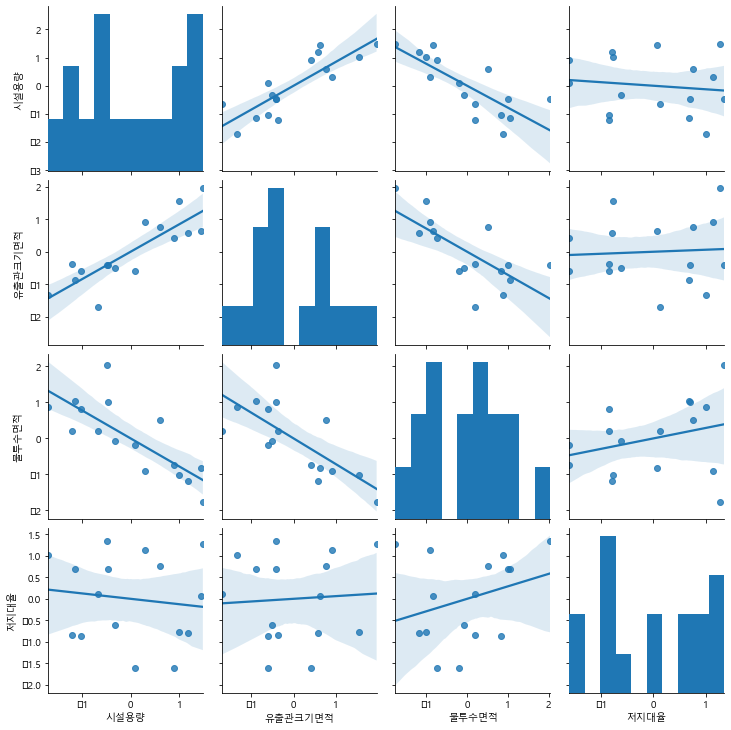

In [11]:
cols = df_2015.columns[[3,4,5,6]]
sns.pairplot(df_2015[cols], kind = 'reg')

        시설용량   유출관크기면적     불투수면적      저지대율
0   1.439911  0.638602 -0.828487  0.066854
1  -0.486777 -0.419981  2.042589  1.353763
2  -1.134716 -0.880235  1.044806  0.688045
3  -0.457183 -0.419981  1.000871  0.698546
4  -1.703845 -1.340489  0.876497  1.011026
5  -1.026311 -0.604083  0.822557 -0.854462
6   0.599770  0.776678  0.506864  0.765463
7  -0.663153 -1.708691  0.202257  0.117839
8  -1.210600 -0.373956  0.196761 -0.852283
9  -0.321676 -0.512032 -0.070484 -0.613462
10  0.084844 -0.604083 -0.194126 -1.615003
11  0.901950  0.408475 -0.736071 -1.615003
12  0.301655  0.914754 -0.904633  1.143565
13  1.006290  1.559109 -1.016275 -0.775206
14  1.182449  0.592577 -1.182819 -0.802152
15  1.487393  1.973337 -1.760305  1.282470


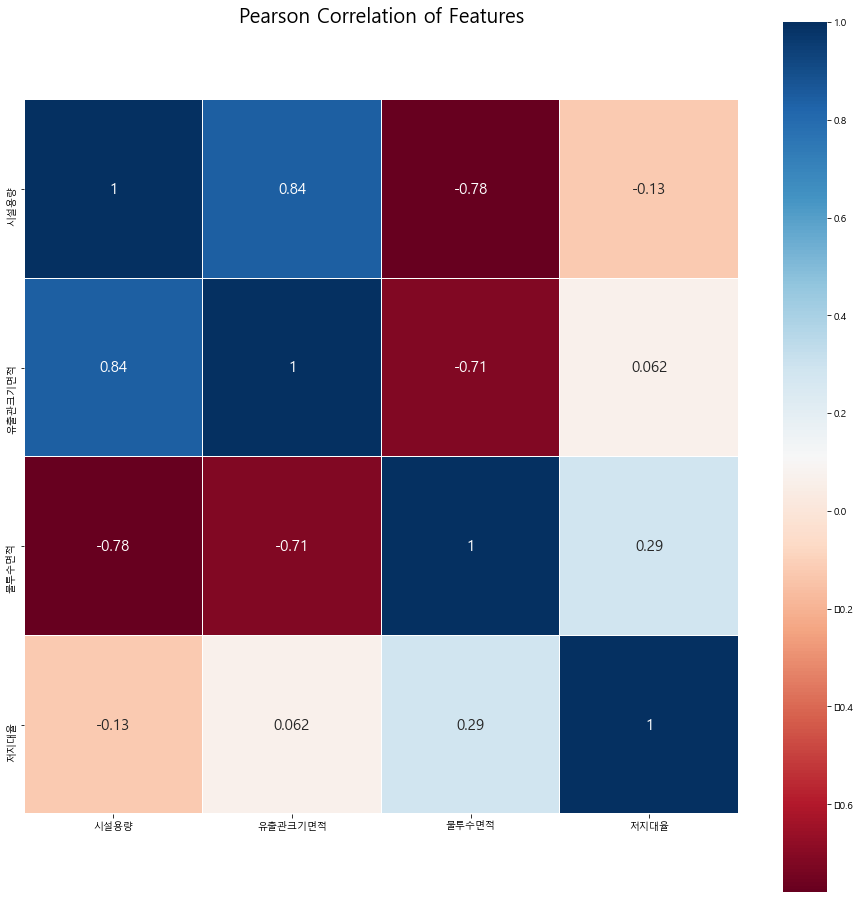

In [15]:
# 필요 특징만 꺼내서 진행 
heatmap_data = df_2015[['시설용량', '유출관크기면적', '불투수면적', '저지대율']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(16, 16))
plt.title('Pearson Correlation of Features', y=1.1, size=20)

sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 15})

print(heatmap_data)

In [13]:
import scipy.stats as stats

In [14]:
cor1 = stats.pearsonr(df_2015.시설용량, df_2015.유출관크기면적) #피어슨 상관분석
cor1

(0.8446577141993865, 3.841713744748429e-05)

In [16]:
cor1_spear = stats.spearmanr(df_2015.시설용량, df_2015.유출관크기면적) #스피어만 상관계수 검정
cor1_spear

SpearmanrResult(correlation=0.7952880495319079, pvalue=0.00023060363042941252)

In [17]:
cor2 = stats.pearsonr(df_2015.시설용량, df_2015.불투수면적)
cor2

(-0.7791350723932424, 0.0003746576355439746)

In [18]:
cor2_spear = stats.spearmanr(df_2015.시설용량, df_2015.불투수면적)
cor2_spear

SpearmanrResult(correlation=-0.7941176470588236, pvalue=0.0002391909276256312)

In [19]:
cor3 = stats.pearsonr(df_2015.시설용량, df_2015.저지대율)
cor3

(-0.12562973673708977, 0.6429343995034401)

In [20]:
cor3_spear = stats.spearmanr(df_2015.시설용량, df_2015.저지대율)
cor3_spear

SpearmanrResult(correlation=-0.02207506116394726, pvalue=0.9353253445612628)

In [21]:
import statsmodels.formula.api as smf

In [27]:
model2 = smf.ols(formula = '도시피해면적 ~ 시설용량+유출관크기면적+불투수면적+저지대율', data = df_2015)
result = model2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 도시피해면적   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     2.429
Date:                Tue, 22 Sep 2020   Prob (F-statistic):              0.110
Time:                        17:56:42   Log-Likelihood:                 51.133
No. Observations:                  16   AIC:                            -92.27
Df Residuals:                      11   BIC:                            -88.40
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4037      0.003   -135.185      0.0

In [25]:
model3 = smf.ols(formula = '도시피해면적 ~ 시설용량+유출관크기면적+저지대율', data = df_2015)
result2 = model3.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 도시피해면적   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     2.224
Date:                Tue, 22 Sep 2020   Prob (F-statistic):              0.138
Time:                        16:58:13   Log-Likelihood:                 49.606
No. Observations:                  16   AIC:                            -91.21
Df Residuals:                      12   BIC:                            -88.12
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4037      0.003   -128.345      0.0